# Opdracht 7


## Dataset
De waarden van de dataset zijn resultaten van verschillende examens. Daarbij zijn er extra waarden die het hebben over
man/vrouw, etniciteit, wat voor educatie de ouders hebben gehad, type lunch en of ze de cursus voor de examens hebben
gedaan.

## Doel
Het doel is om met de data die gegeven is een voorspelling te maken of de persoon een man/vrouw is.

### Imports

In [347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [348]:
from scipy.stats import ttest_ind
from sklearn.feature_selection import f_oneway
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

data = pd.read_csv("./StudentsPerformance.csv")

In [349]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [350]:
print(f'shape overall shape of the data: {data.shape}')

shape overall shape of the data: (1000, 8)


In [351]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Uit de basis informatie kan je zien dat er geen null waarden zijn en verwacht ik ook geen rare waarden

<AxesSubplot:xlabel='gender', ylabel='count'>

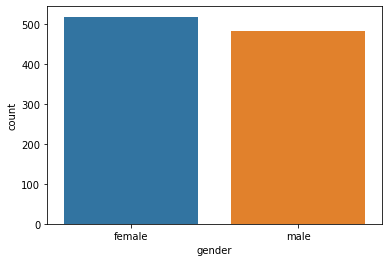

In [352]:
sns.countplot(x="gender", data=data)

In [353]:
px.pie(data["gender"].value_counts().reset_index(),names="index",values="gender")

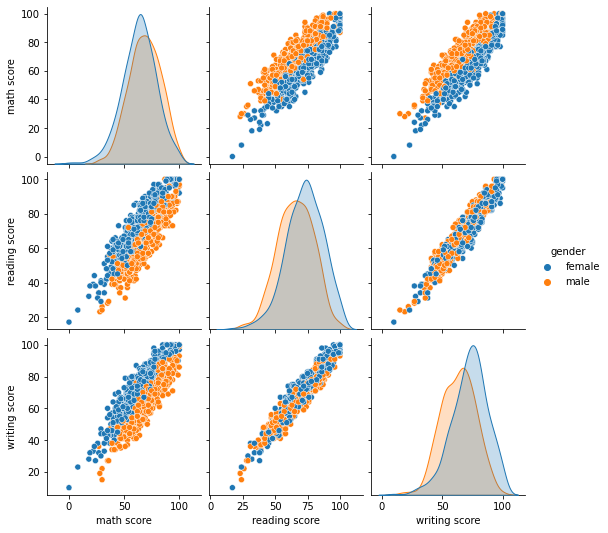

In [354]:
sns.pairplot(data, hue="gender")

Uit de grafieken komt hele handige resultaten. Bij de regressie stukken zie je een duidelijk verschil tussen mannen en
vrouwen bij alle vakken. Sinds we kijken naar twee verschillende groepen (mannen/vrouwen) kunnen we one way ANOVA
gebruiken.


## T-test

In [355]:
def onewayTTest(d1,d2, variables, value="value"):
        for variable in variables:
            t, p = ttest_ind(d1[variable],d2[variable], equal_var=False)
            print(f'Difference between {value} and {variable} by t-test')
            print(f'T-value: {t} | P-value: {p}')

def onewayAnova(d1,d2, variables, value="value"):
    for variable in variables:
        t, p = f_oneway(d1[variable],d2[variable])
        print(f'Difference between {value} and {variable} by ANOVA')
        print(f'F-value: {t} | P-value: {p}')

In [356]:
female, male = [g for _, g in data.groupby(['gender'])]
print(male.shape)
print(female.shape)

(482, 8)
(518, 8)


### Anova

In [357]:
onewayAnova(male,female,["math score", "reading score", "writing score"], value="gender")

Difference between gender and math score by ANOVA
F-value: [28.9793361] | P-value: [9.12018555e-08]
Difference between gender and reading score by ANOVA
F-value: [63.35058392] | P-value: [4.68053874e-15]
Difference between gender and writing score by ANOVA
F-value: [99.59157608] | P-value: [2.01987771e-22]


### T-test

In [ ]:
onewayTTest(male,female,["math score", "reading score", "writing score"], value="gender")

De gegeven P waardes zijn allemaal super laag. Dit is een goed teken, want dat betekent dat de toevalspercentage ook
heel laag is. Voor ANOVA is bij alle drie de waarden een grote F value geconstateerd en een kleine p. Dit betekend dat
de Null hypothese laten vallen.

Bijna geen toeval geeft aan dat de T-toets als valide gerekend kan worden.
Daarnaast zijn er hoge T waarden. Dit duid aan dat er een groot verschil is tussen de verschillende scores en geslacht.
Dit is goed om te weten voor het maken van het model.

## Model selectie
Er zijn verschillende dingen waar naar gekeken moet worden voor het selecteren van het model.
- De waardes van de cijfers komen overeen met lineare regressie.
- Er zijn meerdere waardes die in lineare regressie werken (wiskunde, reading score, writing score)
- Er is duidelijk verschil tussen geslacht te zien in de regressie grafieken.

Hierdoor kunnen we verschillende modellen kiezen. KNN kan altijd omdat er duidelijke verschillen zijn en daardoor
makkelijk goede neighbours gevonden kunnen worden. Lineare modellen zoals SVM kunnen hier ook heel goed bij werken
vanwege de punten die bovenaan gemeld zijn. SVM geeft vaak een hoge accuraatheid en hoeft niet veel berekeningen te doen
vanwege de lage hoeveelheid waardes van de dataset. Sinds het een man/vrouw antwoord moet worden (0/1) is Logistic
regression ook een goede keuze voor dit model.

Voor dit probleem gebruik ik SVM als een classifier en Logistic regression. Ik denk dat deze twee modellen al een hoge
accuraatheid gaan krijgen, maar ik denk dat de SVM het toch iets beter gaat doen, omdat die classifier bekend staat voor
hoge accuraatheid.


## Data preparation


In [359]:
dum = pd.get_dummies(data[['race/ethnicity','parental level of education','lunch', 'test preparation course']])
x = dum.join(data[['math score','reading score','writing score']])
x.head()

,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,math score,reading score,writing score
0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,72,72,74
1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,69,90,88
2,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,90,95,93
3,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,47,57,44
4,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,76,78,75


In [360]:
le = LabelEncoder()
y = data.gender
y = le.fit_transform(y)
np.unique(y)

array([0, 1])

In [361]:
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=42)

## SVM

In [362]:
svmClf = SVC(gamma = 0.001, C=100, kernel="rbf")
svmClf.fit(X_train,y_train)
svmPred = svmClf.predict(X_test)
print(classification_report(svmPred,y_test))


              precision    recall  f1-score   support

           0       0.93      0.96      0.94        94
           1       0.96      0.93      0.95       106

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



## Logistic regression

In [363]:
lrClf = LogisticRegression(C=10.0, penalty = "l2", max_iter=5000)
lrClf.fit(X_train,y_train)
lrPred = lrClf.predict(X_test)
print(classification_report(lrPred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        95
           1       0.91      0.90      0.90       105

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



## Results

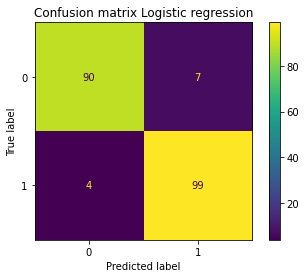

In [364]:
plot_confusion_matrix(svmClf,X_test,y_test)
plt.title("Confusion matrix Logistic regression")
plt.show()

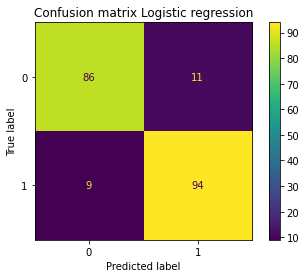

In [365]:
plot_confusion_matrix(lrClf,X_test,y_test)
plt.title("Confusion matrix Logistic regression")
plt.show()

## Conclusie
Zoals je ziet doen beide classifiers het heel goed. De eerste aanpassing was de andere columns ook toevoegen in de x
data. Hieruit kreeg ik direct beter resultaat. Dit was een sprong van 5/10%, dus die aanpassing heb ik behouden.
De SVC is na wat aanpassingen in beter dan de LR classifier met aanpassingen. Hieruit is de hypothese dat was opgesteld
goed uitgekomen.